# Embeddings

In this notebook we want to evaluate which embedding of the meta paths is most suitable for our active learning approach.

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo
%matplotlib inline
from active_learning.oracles import UserOracle
from active_learning.evaluation import *
from active_learning.active_learner import RandomSelectionAlgorithm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## Embedding Strategies

Here you can define functions, which implement an embedding strategy. They get a list of MetaPath-objects as an input and transform it to a vector.


In [2]:
def _constant_transform(meta_paths):
    return np.array([[1] for mp in meta_paths])

def _length_based_transform(meta_paths):
        """
        Trivial transformation into feature space of length x unique_length.
        """
        return np.array([[len(mp), len(set(mp.as_list()))] for mp in meta_paths])

def _tfidf_transform(meta_paths):
        """
        Transform the metapaths as tfidf vectors.
        """
        vectorizer = TfidfVectorizer(analyzer='word', token_pattern='\\b\\w+\\b')
        vectorizer.fit([str(mp) for mp in meta_paths])
        return vectorizer.transform(map(str, meta_paths)).toarray()

In [3]:
embedding_functions = [_length_based_transform, _tfidf_transform, _constant_transform]

### Plot function

In [4]:
def plot_ratings(kdd_raters,batch_size,seed,algorithm,oracle,algo_params):
    for rater in kdd_raters:
        oracle = UserOracle(rater)
        evaluator = Evaluator(algorithm=algorithm,
                             oracle=oracle,batch_size=batch_size, dataset_name='Rotten Tomato', **algo_params)
        stats = evaluator.compute()
        stats['mse'].plot(label=rater)
    ax = plt.gca()
    ax.legend(loc='lower left',bbox_to_anchor=(0.5, 0.5))
    plt.ylabel('MSE')
    plt.xlabel('iterations')
    plt.show()

In [5]:
seed = 21

In [6]:
kdd_raters = ['rated_datasets/Rotten Tomato_Merlin_1519148528.2417703.json',
             'rated_datasets/Rotten Tomato_mcfelix_1519142949.904623.json',
             'rated_datasets/Rotten Tomato_Constantin Lange_1519139724.4022887.json',
             'rated_datasets/Rotten Tomato_Potato_1519142479.127663.json',
             'rated_datasets/Rotten Tomato_Juliane_1519146371.039609.json']

### Evaluation

Embedding: _length_based_transform
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[9 3]
 [9 4]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 5]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 4]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [5 3]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 3]
 [5 4]
 [5 4]
 [5 4]]
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[9 3]
 [9 4]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 5]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 4]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [5 3]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 3]
 [5 4]
 [5 4]
 [5 4]]
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[9 3]
 [9 4]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 6]


/home/bpgraphexploration/anaconda3/envs/bpal/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/home/bpgraphexploration/anaconda3/envs/bpal/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[9 3]
 [9 4]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 5]
 [9 5]
 [9 4]
 [9 4]
 [9 5]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 4]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 5]
 [9 6]
 [9 5]
 [9 4]
 [9 5]
 [9 6]
 [9 5]
 [9 6]
 [9 5]
 [5 3]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 4]
 [5 3]
 [5 4]
 [5 4]
 [5 4]]


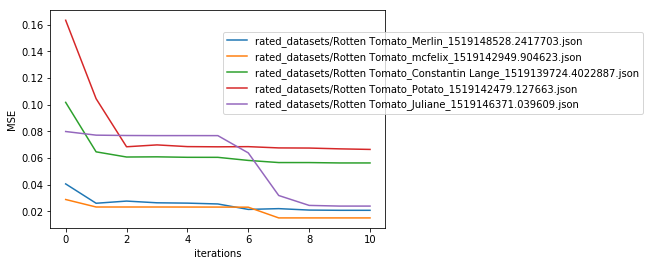

Embedding: _tfidf_transform
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[0.79714385 0.         0.33492212 0.50238318 0.         0.        ]
 [0.68027415 0.25539372 0.381092   0.57163801 0.         0.        ]
 [0.68027415 0.25539372 0.381092   0.57163801 0.         0.        ]
 [0.46811941 0.5272349  0.39336324 0.59004486 0.         0.        ]
 [0.50090401 0.28207982 0.42091231 0.63136847 0.30615818 0.        ]
 [0.23955789 0.26980996 0.40260355 0.60390533 0.58568194 0.        ]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.49539399 0.2789769  0.41628221 0.62442332 0.         0.33698861]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.50090401 0.28207982 0.42091231 0.63136847 0.30615818 0.        ]
 [0.23955789 0.26980996 0.40260355 0.60390533 0.58568194 0.        ]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.49199766 0.         0.41342826 0.6201424  0.30071452 0.33467829]
 [0.49539399 0.27897

ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[0.79714385 0.         0.33492212 0.50238318 0.         0.        ]
 [0.68027415 0.25539372 0.381092   0.57163801 0.         0.        ]
 [0.68027415 0.25539372 0.381092   0.57163801 0.         0.        ]
 [0.46811941 0.5272349  0.39336324 0.59004486 0.         0.        ]
 [0.50090401 0.28207982 0.42091231 0.63136847 0.30615818 0.        ]
 [0.23955789 0.26980996 0.40260355 0.60390533 0.58568194 0.        ]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.49539399 0.2789769  0.41628221 0.62442332 0.         0.33698861]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.50090401 0.28207982 0.42091231 0.63136847 0.30615818 0.        ]
 [0.23955789 0.26980996 0.40260355 0.60390533 0.58568194 0.        ]
 [0.25999713 0.29283033 0.43695396 0.65543094 0.31782636 0.3537228 ]
 [0.49199766 0.         0.41342826 0.6201424  0.30071452 0.33467829]
 [0.49539399 0.2789769  0.41628221 0.62442332 0.

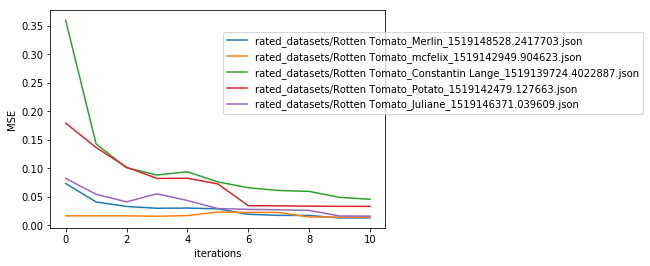

Embedding: _constant_transform
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
ROTTENTOMATOMETAPATHLOADER: Number o

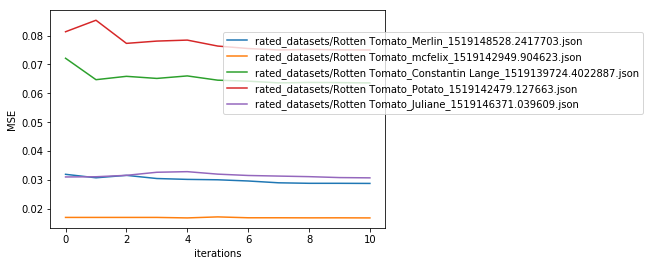

In [7]:
algorithm=UncertaintySamplingAlgorithm
oracle=UserOracle
batch_size = 5

for embedding in embedding_functions:
    algo_params = {'hypothesis': 'Gaussian Process', 'embedding_strategy':  embedding}
    print("Embedding: {}".format(embedding.__name__))
    plot_ratings(kdd_raters,batch_size,seed,algorithm=algorithm,oracle=oracle,algo_params=algo_params)